In [1]:
# Sarah loves music

from carabao.neurotron import Neurotron,Monitor,Record,toy,cat

#===========================================================================
# class Cells
#===========================================================================

class Cells:
    def __init__(self,n,par,sizes,verbose=0):
        self.verbose = verbose
        self.cells = []
        for k in range(n):
            cell = Neurotron(k,par,sizes,'cell-%g'%k)
            self.cells.append(cell)
        self.record = Record(self)
        
    def __call__(self,y,log=None):
        if log is not None:
            if self.verbose > 0: print("\n"+log)
            log = None if self.verbose == 0 else log
        for k in range(len(self.cells)):
            y = self.cells[k](y,log)

        self.record(self)

        if (self.verbose > 0):
            self.log(y,log)
        return y

    def __getitem__(self,k):
        return self.cells[k]

    def range(self):
        return range(len(self.cells))
        
    def plot(self,j,tag=''):   # plot cell column at monitor location (*,j)
        for k in range(len(self.cells)):
            mon(self.cells[k],k,j)
        mon.xlabel(j,tag)

    def log(self,y,tag=None):
        self.record.log(self,y,tag)

    def iterate(self,k,y,tag):
       y = self(y,'iteration %g (%s)'%(k,tag))
       self.plot(k,tag)
       return y
    
    def iteration(self,y):
        self.record.clear()
        tags = ['excite','react','observe','burst','predict','learn','relax1','relax2']
        for k in range(len(tags)): 
            y = self.iterate(k,y,tags[k])
        return y
            
#===========================================================================
# helper: check cell's movie with given pattern
#===========================================================================

def check(cells,pattern):
    """
    check(): check recorder pattern of a network of cells against a given
             pattern and raise exception if check fails.
    >>> par,token = toy('sarah')
    >>> cells = Cells(3,par,[3,10])
    >>> y = cells.iteration([0,0,0]+token['Sarah'])
    >>> check(cells,'|U,U,QB,QBY,DY,D--|---D,XD,X,X,X|---D,D---|')
    """
    p = cells.record.pattern()
    if p != pattern:
        print('expected: ',pattern)
        print('got:      ',p)
        raise Exception('pattern check failed')




iteration 0 (excite)

f: [1, 1, 0, 1, 1, 1, 0, 1, 0, 1] , c: [0, 0, 0]
=> depress-0: #[0 0 0] -> #[1 1 1] -> #[0 0 0] -> :[0]
=> excite-0: #[1 1 0 1 1 1 0 1 0 1] -> #[1 1 0 1 1 1 0 1 0 1] -> #[1 1 0 1 1 1 0 1 0 1] -> :[1]
=> predict-0: #[0 0 0; 0 0 0] -> #[0 0 0; 0 0 0] -> #[0 0 0; 0 0 0] -> :[0 0]
 - d0:  0 -> (0,L0,[0,2,0]) -> 0
 - u0:  1 -> (0,D4,[0,4,4]) -> 1
 - q0:  1 -> (1,L1,[2,1,0]) -> 0
 - s0:  0 -> (0,L0,[0,1,6]) -> 0
 - b0:  0 -> (0,L0,[0,2,3]) -> 0
 - x0:  0 -> (0,L0,[1,8,0]) -> 0
 - l0:  0 -> (0,L0,[1,1,5]) -> 0
 - y0:  0 -> (0,L0,[1,2,0]) -> 0

f: [1, 1, 0, 1, 1, 1, 0, 1, 0, 1] , c: [0, 0, 0]
=> depress-1: #[0 0 0] -> #[1 1 1] -> #[0 0 0] -> :[0]
=> excite-1: #[1 1 0 1 1 1 0 1 0 1] -> #[0 1 1 1 0 1 1 0 1 1] -> #[0 1 0 1 0 1 0 0 0 1] -> :[0]
=> predict-1: #[0 0 0; 0 0 0] -> #[1 0 0; 0 0 0] -> #[0 0 0; 0 0 0] -> :[0 0]
 - d1:  0 -> (0,L0,[0,2,0]) -> 0
 - u1:  0 -> (0,L0,[0,4,4]) -> 0
 - q1:  0 -> (0,L0,[2,1,0]) -> 0
 - s1:  0 -> (0,L0,[0,1,6]) -> 0
 - b1:  0 -> (0,L0,[0,2,

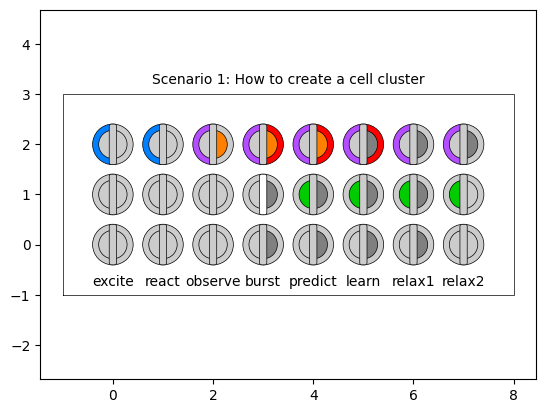

In [2]:
mon = Monitor(3,8,'Scenario 1: How to create a cell cluster')

#===========================================================================
# How to create a cells cluster 
#===========================================================================

par,token = toy('sarah')
cells = Cells(3,par,[3,10],verbose=1)
y = cells.iteration([0,0,0]+token['Sarah'])
check(cells,'|U,U,UQB,UQBY,UQDBY,UQDY,UQD,UQD|---DS,XD,XD,XD,X|---D,D,D,D-|')


iteration 0 (excite)

f: [1, 1, 0, 1, 1, 1, 0, 1, 0, 1] , c: [0, 0, 0]
=> depress-0: #[0 0 0] -> #[1 1 1] -> #[0 0 0] -> :[0]
=> excite-0: #[1 1 0 1 1 1 0 1 0 1] -> #[1 1 0 1 1 1 0 1 0 1] -> #[1 1 0 1 1 1 0 1 0 1] -> :[1]
=> predict-0: #[0 0 0; 0 0 0] -> #[0 0 0; 0 0 0] -> #[0 0 0; 0 0 0] -> :[0 0]
 - d0:  0 -> (0,L0,[0,2,0]) -> 0
 - u0:  1 -> (0,D4,[0,4,4]) -> 1
 - q0:  1 -> (1,L1,[2,1,0]) -> 0
 - s0:  0 -> (0,L0,[0,1,6]) -> 0
 - b0:  0 -> (0,L0,[0,2,3]) -> 0
 - x0:  0 -> (0,L0,[1,8,0]) -> 0
 - l0:  0 -> (0,L0,[1,1,5]) -> 0
 - y0:  0 -> (0,L0,[1,2,0]) -> 0

f: [1, 1, 0, 1, 1, 1, 0, 1, 0, 1] , c: [0, 0, 0]
=> depress-1: #[0 0 0] -> #[1 1 1] -> #[0 0 0] -> :[0]
=> excite-1: #[1 1 0 1 1 1 0 1 0 1] -> #[1 1 0 1 1 1 0 1 0 1] -> #[1 1 0 1 1 1 0 1 0 1] -> :[1]
=> predict-1: #[0 0 0; 0 0 0] -> #[0 0 0; 0 0 0] -> #[0 0 0; 0 0 0] -> :[0 0]
 - d1:  0 -> (0,L0,[0,2,0]) -> 0
 - u1:  1 -> (0,D4,[0,4,4]) -> 1
 - q1:  1 -> (1,L1,[2,1,0]) -> 0
 - s1:  0 -> (0,L0,[0,1,6]) -> 0
 - b1:  0 -> (0,L0,[0,2,

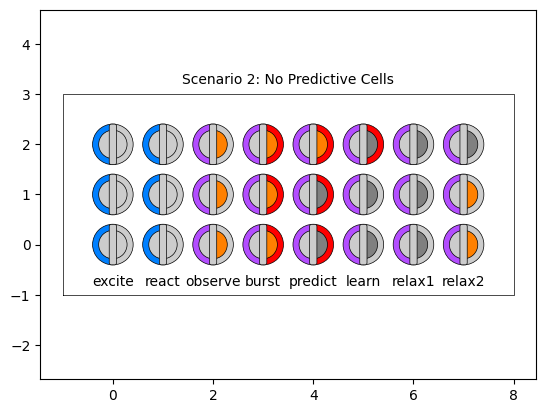

In [6]:
#===========================================================================
# Secario 2: No predictive cells 
#===========================================================================
par,token = toy('sarah');  epar,dpar,ppar,dyn = par
epar.p[2] = epar.p[1] = epar.p[0]             # overwrite => all the same
ppar.P[2][0] = ppar.P[1][0] = ppar.P[0][0]    # overwrite => all the same

y,sizes = cat(c:=[0,0,0],token['Sarah'])
cells = Cells(3,par,sizes,verbose=1)

mon = Monitor(3,8,'Scenario 2: No Predictive Cells')
y = cells.iteration(y)
#check(cells,'|U,U,UQB,UQBY,DY,D--|U,U,UQB,UQDBY,DY---|U,U,UQB,UQDBY,DY---|')

=> learning: L: #[0 0 0; 0 0 0]
             P: #[0.3 0.4 0.1; 0.3 0.4 0.1]
=> learning: L: #[0 0 0; 0 0 0]
             P: #[0.3 0.4 0.1; 0.3 0.4 0.1]


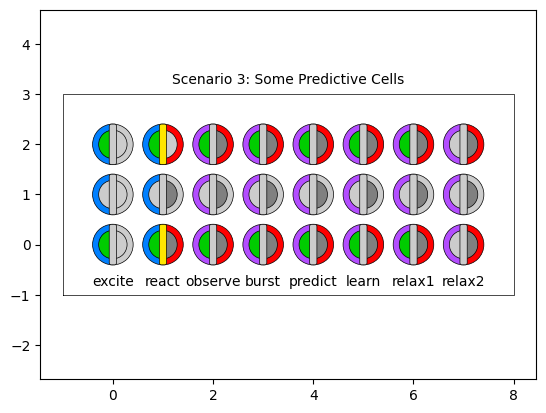

In [4]:
#===========================================================================
# Secario 3: some predictive cells 
#===========================================================================
par,token = toy('sarah');  epar,dpar,ppar,dyn = par
epar.p[2] = epar.p[1] = epar.p[0]             # overwrite => all the same
ppar.P[2][0] = ppar.P[1][0] = ppar.P[0][0]    # overwrite => all the same

y,sizes = cat(c:=[0,0,0],token['Sarah'])
cells = Cells(3,par,sizes,verbose=0)
cells[0].x.set(1)
cells[2].x.set(1)

mon = Monitor(3,8,'Scenario 3: Some Predictive Cells')
y = cells.iteration(y)
#check(cells,'|UX,UXLY,UQXDY,UQXDY,XY,XD,XD-|U,UD,UQD,UQ,D,D--|UX,UXLDY,UQXDY,UQXY,XDY,XD,X-|')

=> learning: L: #[0.1 -0.1 -0.1; 0 -0 -0]
             P: #[0.6 0.1 0.2; 0.3 0.4 0.1]
=> learning: L: #[0.1 0.1 -0.1; 0 0 -0]
             P: #[0.7 0.2 0.1; 0.3 0.4 0.1]
=> learning: L: #[-0.1 0.1 -0.1; -0 0 -0]
             P: #[0 0.8 0.2; 0.3 0.4 0.1]


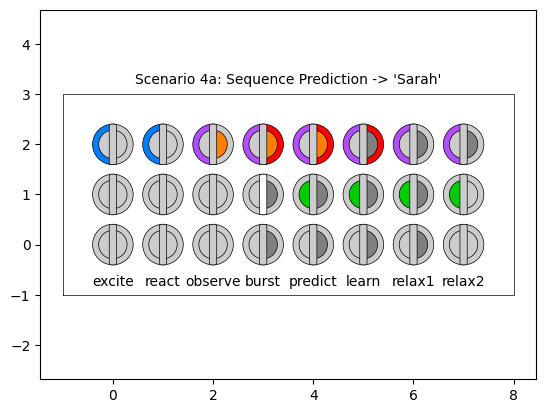

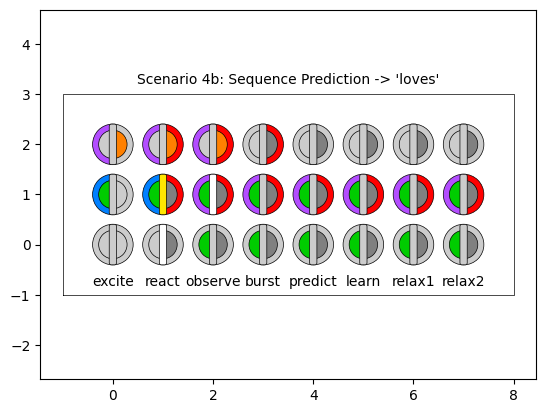

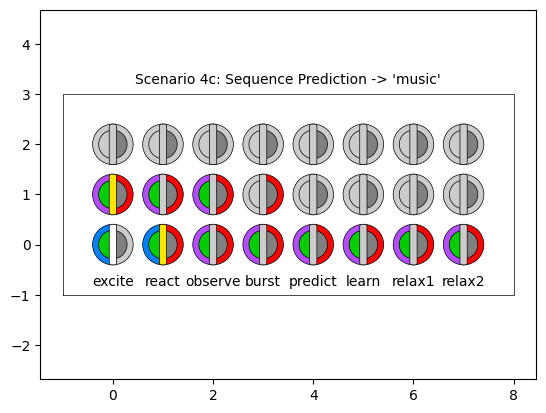

In [5]:
#===========================================================================
# Secario 4: Sequence Prediction -> 'Sarah'
#===========================================================================
par,token = toy('sarah')
#par[0].p[2] = par[0].p[1] = par[0].p[0] # overwrite => all the same

mon = Monitor(3,8,"Scenario 4a: Sequence Prediction -> 'Sarah'")
y,sizes = cat(c:=[0,0,0],token['Sarah'])
cells = Cells(3,par,sizes,verbose=0)
y = cells.iteration(y)
#check(cells,'|U,U,UQB,UQBY,DY,D--|---DS,XD,X,X,X|---D,D---|')

mon = Monitor(3,8,"Scenario 4b: Sequence Prediction -> 'loves'")
y,sizes = cat(c:=y[:3],token['loves'])
y = cells.iteration(y)
#check(cells,'|--D,D-,D,D-|UX,UXLY,UQXDY,UQXDY,Y,D,D-|-DS,XD,X,XD,XD,X,X|')

mon = Monitor(3,8,"Scenario 4c: Sequence Prediction -> 'music'")
y,sizes = cat(c:=y[:3],token['music'])
y = cells.iteration(y)
#check(cells,'|--D,D-,D,D-|--D,D-,D,D-|UX,UXLY,UQXDY,UQXDY,Y,D,D-|')